<a href="https://colab.research.google.com/github/ingcarlosleon/data-Mapainversiones/blob/main/scripts/infrastructure-gap-map/Infra_Gap_KMeans_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**TechSprint para una mayor transparencia gubernamental**

📑**Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

#**🚀 Avance 2. Ingeniería de Datos (Preparación de los Datos):**
El objetivo de este avance es enfocarnos en la limpieza, preprocesamiento y transformación de los datos. Se espera validar y definir las variables georreferenciadas, temporales y demás que se prioricen, preparen e integren de los tres conjuntos de datos analizados en el EDA, para luego usarlos en el modelado.

In [228]:
!pip install pandas requests frictionless

**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

1.   **Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)** Contiene la información espacial de las Obras de la República Argentina
2.   **Dataset: Proyectos de Inversión de la República Argentina (investment_projects)** Contiene información de los proyectos de obras de Inversión de La República Argentina
3.  **Obras de la República Argentina (datos_espaciales)** Contiene información de las Obras de la República Argentina

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [229]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

In [230]:
df_spatial_data_works.info()
df_investment_projects.info()
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

### Análisis de Nulos

Eliminamos las columnas organismo_financiador_2, organismo_financiador_prestamo y codigo_bahra por tener un gran porcentaje de datos faltantes de **df_spatial_data_works**.

In [231]:
df_spatial_data_works = df_spatial_data_works.drop(['organismo_financiador_2', 'organismo_financiador_prestamo', 'codigo_bahra'], axis=1)
df_spatial_data_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                7317 non-null   int64  
 1   numeroobra                7317 non-null   object 
 2   codigobapin               7317 non-null   object 
 3   fechainicioanio           7317 non-null   int64  
 4   fechafinanio              7317 non-null   int64  
 5   nombreobra                7317 non-null   object 
 6   descripicionfisica        7317 non-null   object 
 7   montototal                7317 non-null   float64
 8   sectornombre              7317 non-null   object 
 9   avancefinanciero          7317 non-null   float64
 10  avancefisico              7317 non-null   float64
 11  entidadejecutoranombre    7317 non-null   object 
 12  duracionobrasdias         7317 non-null   int64  
 13  objetivogeneral           7317 non-null   object 
 14  tipoproy

Eliminamos la columna Objetivo la cual tiene el 78.9 % de datos faltantes en **df_investment_projects**

In [232]:
df_investment_projects = df_investment_projects.drop(['Objetivo'], axis=1)
df_investment_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Descripcion         630 non-null    object 
 11  NombreProvincia     630 non-null    object 
 12  NombreDepartamento  630 non-null    object 
 13  FechaCargueArchivo  630 non-null    object 
 14  FuenteDatos         630 non-null    object 
 15  url_perfil_obra     630 non-null    object 
dtypes: float

Eliminamos la columna Descripcion la cual tiene el 100 % de datos faltantes en **df_datos_espaciales**

In [233]:
df_datos_espaciales = df_datos_espaciales.drop(['Descripcion'], axis=1)
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IdVisorMapas             6996 non-null   int64 
 1   IdProyecto               6996 non-null   int64 
 2   CodigoBPIN               6996 non-null   object
 3   JSON                     6996 non-null   object
 4   Fecha                    6996 non-null   object
 5   FechaUltimaModificacion  6996 non-null   object
 6   ConsecutivoCarga         6996 non-null   int64 
 7   Modificadopor            6996 non-null   object
dtypes: int64(3), object(5)
memory usage: 437.4+ KB


### Análisis de la columna IdProyecto en los tres dataframes

In [234]:
ids_spatial_data_works = set(df_spatial_data_works['idproyecto'])
ids_investment_projects = set(df_investment_projects['IdProyecto'])
ids_datos_espaciales = set(df_datos_espaciales['IdProyecto'])

# Continuar con el análisis como antes
common_ids_spatial_investment = ids_spatial_data_works.intersection(ids_investment_projects)
common_ids_spatial_datos_espaciales = ids_spatial_data_works.intersection(ids_datos_espaciales)
common_ids_investment_datos_espaciales = ids_investment_projects.intersection(ids_datos_espaciales)
common_ids_all = ids_spatial_data_works.intersection(ids_investment_projects).intersection(ids_datos_espaciales)

# Resumen de IdProyectos comunes
print(f"Total IdProyectos en df_spatial_data_works: {len(ids_spatial_data_works)}")
print(f"Total IdProyectos en df_investment_projects: {len(ids_investment_projects)}")
print(f"Total IdProyectos en df_datos_espaciales: {len(ids_datos_espaciales)}")

print(f"\nIdProyectos comunes entre df_spatial_data_works y df_investment_projects: {len(common_ids_spatial_investment)}")
print(f"IdProyectos comunes entre df_spatial_data_works y df_datos_espaciales: {len(common_ids_spatial_datos_espaciales)}")
print(f"IdProyectos comunes entre df_investment_projects y df_datos_espaciales: {len(common_ids_investment_datos_espaciales)}")
print(f"IdProyectos comunes en los tres datasets: {len(common_ids_all)}")


Total IdProyectos en df_spatial_data_works: 7317
Total IdProyectos en df_investment_projects: 630
Total IdProyectos en df_datos_espaciales: 5342

IdProyectos comunes entre df_spatial_data_works y df_investment_projects: 2
IdProyectos comunes entre df_spatial_data_works y df_datos_espaciales: 5334
IdProyectos comunes entre df_investment_projects y df_datos_espaciales: 2
IdProyectos comunes en los tres datasets: 2


**🔎 Análisis de los Resultados**

**Baja Intersección entre df_spatial_data_works y df_investment_projects:**

*  Solo 2 IdProyectos son comunes entre estos datasets. Esto sugiere que la mayoría de los proyectos en estos dos conjuntos de datos no están directamente relacionados o son diferentes.

**Alta Intersección entre df_spatial_data_works y df_datos_espaciales:**

*  5334 proyectos son comunes entre estos datasets, lo que indica una fuerte correlación entre la información espacial y los datos de los proyectos.

**Muy Poca Intersección entre df_investment_projects y df_datos_espaciales:**

*  Solo 2 proyectos comunes sugieren que df_investment_projects tiene un alcance o un tipo de datos muy específico, que no se cruza mucho con la información en los otros datasets.

**Solo 2 Proyectos Comunes en los Tres Datasets:**

*  Esto indica que hay muy pocos proyectos que están documentados en los tres datasets simultáneamente.

### Selección de Datasets spatial_data_works y datos_espaciales

Seleccionamos los datasets cargados en los dataframes **df_spatial_data_works y df_datos_espaciales**, dado que estos datasets tienen una alta intersección entre las columnas de IdProyectos. En total existen **5334 IdProyectos coincidentes y/o comunes**). Datasets seleccionados:

1.   **Dataset: Datos espaciales - Obras de la República Argentina (df_spatial_data_works)** Contiene la información espacial de las Obras de la República Argentina
2.  **Obras de la República Argentina (df_datos_espaciales)** Contiene información de las Obras de la República Argentina

In [235]:
df_spatial_data_works.info()
print("\n")
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                7317 non-null   int64  
 1   numeroobra                7317 non-null   object 
 2   codigobapin               7317 non-null   object 
 3   fechainicioanio           7317 non-null   int64  
 4   fechafinanio              7317 non-null   int64  
 5   nombreobra                7317 non-null   object 
 6   descripicionfisica        7317 non-null   object 
 7   montototal                7317 non-null   float64
 8   sectornombre              7317 non-null   object 
 9   avancefinanciero          7317 non-null   float64
 10  avancefisico              7317 non-null   float64
 11  entidadejecutoranombre    7317 non-null   object 
 12  duracionobrasdias         7317 non-null   int64  
 13  objetivogeneral           7317 non-null   object 
 14  tipoproy

#### Insights sobre el Dataset: Datos espaciales - Obras de la República Argentina (df_spatial_data_works)

Aquí algunas de las conclusiones del EDA sobre el conjunto de datos **Datos espaciales - Obras de la República Argentina (df_spatial_data_works):**
<br><br>
**Variables categóricas:**

*  **departamentos**, con las opciones más frecuentes representando una gran proporción del total de proyectos. Por ejemplo, **los departamentos más comunes podrían concentrar más del 50% de los proyectos**, lo que indica una fuerte centralización geográfica de las inversiones.

*  **nombreprovincia:** **De las 24 opciones disponibles en nombreprovincia, unas pocas dominan significativamente**, lo que sugiere que la mayoría de los proyectos se encuentran en un pequeño número de provincias. Por ejemplo, **las 5 provincias más frecuentes podrían abarcar el 80% de los proyectos**, **lo que refleja una distribución geográfica desigual**.

*  sectornombre: La variable sectornombre revela que ciertos sectores, como **infraestructura o educación, pueden estar altamente priorizados**, con solo unos pocos sectores representando la mayoría de los proyectos. Esto indica áreas de enfoque clave en la inversión pública.

*  **tipoproyecto:** Aunque hay 195 tipos de proyectos, algunos tipos específicos, como construcción o renovación, son mucho más comunes. Por ejemplo, **los 10 tipos de proyectos más frecuentes podrían cubrir el 70% del total**, destacando las áreas de intervención preferidas.

*  Estos insights sugieren que **hay una concentración significativa tanto geográfica como sectorial en los datos**, lo que podría influir en los resultados del análisis y debería considerarse en el modelado posterior.
<br>

**Resultados del Análisis de Tendencias Temporales**

**Tendencia Temporal - Top 10 Tipos de Proyecto por Año:**
*  Pico de Proyectos en 2021 y 2022: Durante 2021 y 2022, se observó un marcado aumento en proyectos como "Pavimentación de Calles," "Renovación," y "Centros de Desarrollo Infantil," lo que indica un enfoque intensivo en infraestructura básica durante estos años.

*  Disminución en 2023: El número de proyectos disminuye notablemente en 2023, lo que podría reflejar una culminación de proyectos iniciados anteriormente o ajustes en la planificación y asignación de recursos.

*  Diversificación de Inversiones: La variedad de proyectos sugiere una estrategia amplia, abarcando desde la infraestructura vial hasta el desarrollo comunitario, adaptándose a las necesidades locales y nacionales.

*  Impacto Post-Pandemia: El enfoque en proyectos como redes de provisión de agua potable y saneamiento destaca la posible influencia de la pandemia en la priorización de necesidades básicas, reflejando una respuesta a las demandas emergentes de la crisis sanitaria.

**Tendencia Temporal - Top 10 Departamentos por Año**

*  Concentración de Proyectos en Departamentos Clave: Departamentos como "Capital," "La Matanza," y "General San Martín" muestran un notable incremento en proyectos, especialmente durante el período 2020-2021, indicando una alta concentración de inversión en estas áreas metropolitanas.

*  Pico de Proyectos en 2021: Estos departamentos lideraron en volumen de proyectos en 2021, seguido por una caída en 2022-2023, lo que podría reflejar cambios en las políticas de inversión.

*  Patrones Similares entre Departamentos: A pesar de variaciones en la cantidad, los departamentos siguen un patrón temporal similar, sugiriendo influencias comunes en las decisiones de inversión.

*  Concentración Metropolitana: La mayoría de los proyectos están centrados en áreas metropolitanas, lo que sugiere una prioridad en el desarrollo urbano.

**Tendencia Temporal - Top 10 Provincias por Año**

*  Dominancia de Buenos Aires: La provincia de Buenos Aires lidera en número de proyectos, alcanzando un pico notable en 2021 con más de 1000 proyectos, superando significativamente a otras provincias.

*  Concentración en Provincias Clave: Provincias como Córdoba, Santa Fe y Entre Ríos muestran actividad considerable en 2021, aunque en menor escala que Buenos Aires.

*  Disminución Generalizada: Existe una caída pronunciada en 2022 y 2023, lo que podría reflejar ajustes en políticas de inversión o restricciones presupuestarias.

*  Crecimiento Acelerado: A partir de 2020, muchas provincias experimentan un crecimiento casi simultáneo en proyectos, sugiriendo una coordinación en las políticas de inversión pública.

#### Insights sobre el Dataset: Obras de la República Argentina (df_datos_espaciales)

Aquí algunas de las conclusiones del EDA sobre el conjunto de datos **Obras de la República Argentina (df_datos_espaciales)**. Contiene información de las Obras de la República Argentina más datos georreferenciados en JSON
<br><br>
**Conclusiones sobre la Cardinalidad de las Variables Categóricas:**

*  JSON: La columna JSON muestra una alta cardinalidad, con 6996 valores únicos, lo que indica una gran diversidad en los datos geoespaciales almacenados. Esto sugiere que cada registro tiene un conjunto de coordenadas único o muy variado.

*  CodigoBPIN: Presenta una cardinalidad de 1908, lo que indica que hay una cantidad considerable de códigos únicos asociados con los proyectos en el dataset. Esta diversidad podría ser crucial para análisis específicos relacionados con la identificación de proyectos.

*  Modificadopor: La columna Modificadopor tiene una cardinalidad extremadamente baja, con solo 1 valor único. Esto indica que probablemente todos los registros fueron modificados por la misma persona o que la información no fue actualizada correctamente.

*  Estos resultados nos proporcionan una visión clara sobre la diversidad y homogeneidad de las categorías en el conjunto de datos. Las columnas con alta cardinalidad, como JSON y CodigoBPIN, serán fundamentales en análisis más detallados, mientras que columnas con baja cardinalidad, como Modificadopor, podrían requerir una revisión para entender su relevancia o calidad de los datos.


###Filtrado de Características y Variables

Se seleccionan las columnas relevantes de ambos dataframes. En df_spatial_data_works, nos enfocaremos en las variables que reflejan la inversión en infraestructura, mientras que en df_datos_espaciales nos centraremos en las coordenadas y fechas relevantes.

In [247]:
print("df_spatial_data_works:\n")
print(df_spatial_data_works.info())
df_spatial_data_works.head(2)

df_spatial_data_works:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                7317 non-null   int64  
 1   numeroobra                7317 non-null   object 
 2   codigobapin               7317 non-null   object 
 3   fechainicioanio           7317 non-null   int64  
 4   fechafinanio              7317 non-null   int64  
 5   nombreobra                7317 non-null   object 
 6   descripicionfisica        7317 non-null   object 
 7   montototal                7317 non-null   float64
 8   sectornombre              7317 non-null   object 
 9   avancefinanciero          7317 non-null   float64
 10  avancefisico              7317 non-null   float64
 11  entidadejecutoranombre    7317 non-null   object 
 12  duracionobrasdias         7317 non-null   int64  
 13  objetivogeneral           7317 non-null

,idproyecto,numeroobra,codigobapin,fechainicioanio,fechafinanio,nombreobra,descripicionfisica,montototal,sectornombre,avancefinanciero,...,tipomoneda,url_perfil_obra,programa_infraestructura,organismo_financiador_1,contraparte_key,contraparte_val,contraparte_cuit,contraparte_modalidad,tag_accionclimatica,tag_ods_incidencia
0,1610,NA70056,10,2019,2020,CIERRE DE MALLA RINCON DE MILBERG – MODULO 3,Instalación de red secundaria de agua en Sec...,17872007.0,AGUA Y CLOACA,100.0,...,pesos argentinos,https://mapainversiones.obraspublicas.gob.ar/P...,SIN PROGRAMA,-,-,-,-,A+T,Adaptación,ODS 6 DIRECTA
1,1613,NA70116,13,2019,2021,RED SECUNDARIA DE AGUA B EL ARCO M2 + AMPLIACION,Instalación por vereda de cañería de DN 160 mm...,7428947.0,AGUA Y CLOACA,100.0,...,pesos argentinos,https://mapainversiones.obraspublicas.gob.ar/P...,SIN PROGRAMA,-,-,-,-,A+T,Adaptación,ODS 6 DIRECTA


In [237]:
df_spatial_data_works["nombredepto"]

,nombredepto
0,TIGRE
1,TIGRE
2,TIGRE
3,PILAR
4,PILAR
...,...
7312,ESTEBAN ECHEVERRÍA
7313,LA PLATA
7314,GENERAL PUEYRREDÓN
7315,CAPITAL


In [238]:
print("df_datos_espaciales:\n")
print(df_datos_espaciales.info())
df_datos_espaciales.head(2)

df_datos_espaciales:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IdVisorMapas             6996 non-null   int64 
 1   IdProyecto               6996 non-null   int64 
 2   CodigoBPIN               6996 non-null   object
 3   JSON                     6996 non-null   object
 4   Fecha                    6996 non-null   object
 5   FechaUltimaModificacion  6996 non-null   object
 6   ConsecutivoCarga         6996 non-null   int64 
 7   Modificadopor            6996 non-null   object
dtypes: int64(3), object(5)
memory usage: 437.4+ KB
None


,IdVisorMapas,IdProyecto,CodigoBPIN,JSON,Fecha,FechaUltimaModificacion,ConsecutivoCarga,Modificadopor
0,418304,10011441,109089,"{""type"": ""FeatureCollection"",\n ""features"": [...",2008-07-01,2024-05-20 16:55:56.820,1,MapaInvDatosSS2\sqlAdmin
1,418305,10011494,109096,"{""type"": ""FeatureCollection"",\n ""features"": [...",2009-02-25,2024-05-20 16:55:56.820,1,MapaInvDatosSS2\sqlAdmin


In [248]:
# import pandas as pd
# # Seleccionar las variables relevantes en df_spatial_data_works
# relevant_columns_spatial = [
#     'idproyecto', 'fechainicioanio', 'fechafinanio', 'montototal',
#     'avancefinanciero', 'avancefisico', 'duracionobrasdias', 'sectornombre',
#     'tipoproyecto', 'nombredepto', 'nombreprovincia'
# ]
# df_spatial_filtered = df_spatial_data_works[relevant_columns_spatial].copy()

# # Convertir 'sectornombre', 'tipoproyecto', 'nombredepto', y 'nombreprovincia' a códigos numéricos
# df_spatial_filtered.loc[:, 'sectornombre'] = pd.Categorical(df_spatial_filtered['sectornombre']).codes
# df_spatial_filtered.loc[:, 'tipoproyecto'] = pd.Categorical(df_spatial_filtered['tipoproyecto']).codes
# df_spatial_filtered.loc[:, 'nombredepto'] = pd.Categorical(df_spatial_filtered['nombredepto']).codes
# df_spatial_filtered.loc[:, 'nombreprovincia'] = pd.Categorical(df_spatial_filtered['nombreprovincia']).codes

# # Seleccionar las variables relevantes en df_datos_espaciales
# relevant_columns_datos_espaciales = [
#     'IdProyecto', 'Fecha', 'CodigoBPIN', 'JSON'
# ]
# df_datos_espaciales_filtered = df_datos_espaciales[relevant_columns_datos_espaciales].copy()

# # Convertir 'Fecha' a año
# df_datos_espaciales_filtered['Fecha'] = pd.to_datetime(df_datos_espaciales_filtered['Fecha'], errors='coerce').dt.year

import pandas as pd

# Seleccionar las variables relevantes en df_spatial_data_works
relevant_columns_spatial = [
    'idproyecto', 'fechainicioanio', 'fechafinanio', 'montototal',
    'avancefinanciero', 'avancefisico', 'duracionobrasdias', 'sectornombre',
    'tipoproyecto', 'nombredepto', 'nombreprovincia'
]
df_spatial_filtered = df_spatial_data_works[relevant_columns_spatial].copy()

# Crear una copia de las columnas categóricas antes de convertirlas a códigos numéricos
df_spatial_filtered['nombredepto_original'] = df_spatial_filtered['nombredepto']
df_spatial_filtered['nombreprovincia_original'] = df_spatial_filtered['nombreprovincia']
df_spatial_filtered['sectornombre_original'] = df_spatial_filtered['sectornombre']
df_spatial_filtered['tipoproyecto_original'] = df_spatial_filtered['tipoproyecto']

# Convertir 'sectornombre', 'tipoproyecto', 'nombredepto', y 'nombreprovincia' a códigos numéricos
df_spatial_filtered['sectornombre'] = pd.Categorical(df_spatial_filtered['sectornombre']).codes
df_spatial_filtered['tipoproyecto'] = pd.Categorical(df_spatial_filtered['tipoproyecto']).codes
df_spatial_filtered['nombredepto'] = pd.Categorical(df_spatial_filtered['nombredepto']).codes
df_spatial_filtered['nombreprovincia'] = pd.Categorical(df_spatial_filtered['nombreprovincia']).codes

# Seleccionar las variables relevantes en df_datos_espaciales
relevant_columns_datos_espaciales = [
    'IdProyecto', 'Fecha', 'CodigoBPIN', 'JSON'
]
df_datos_espaciales_filtered = df_datos_espaciales[relevant_columns_datos_espaciales].copy()

# Convertir 'Fecha' a año
df_datos_espaciales_filtered['Fecha'] = pd.to_datetime(df_datos_espaciales_filtered['Fecha'], errors='coerce').dt.year

###Combinación de los Dataframes y Procesamiento de la Variable JSON

Combinamos los dos dataframes utilizando la columna idproyecto en df_spatial_data_works y IdProyecto en df_datos_espaciales para asegurarnos de que tenemos un dataset unificado que podemos utilizar para el análisis de clustering. Adicionalmente se limpia y procesa la columna JSON para extraer las coordenadas geográficas del dataframe **df_datos_espaciales**.

In [249]:
import pandas as pd
import json
import re
from shapely.geometry import shape
import geopandas as gpd

# Combinar los dataframes utilizando la columna IdProyecto
df_combined = pd.merge(df_spatial_filtered, df_datos_espaciales_filtered,
                       left_on='idproyecto', right_on='IdProyecto',
                       how='inner')

# Función para limpiar y decodificar JSON
def clean_and_load_json(geojson_str):
    try:
        # Reemplazar caracteres de control no válidos
        cleaned_str = re.sub(r'[\x00-\x1F\x7F]', '', geojson_str)
        geojson = json.loads(cleaned_str)
        features = geojson.get('features', [])
        if features:
            geometry = features[0]['geometry']  # Consideramos la primera geometría para simplificación
            return shape(geometry)
    except (json.JSONDecodeError, TypeError) as e:
        print(f"Error al decodificar JSON: {e}")
        return None

# Aplicar la función a la columna JSON para extraer las geometrías
df_combined['geometry'] = df_combined['JSON'].apply(clean_and_load_json)

# Crear un GeoDataFrame para facilitar la visualización geográfica
gdf_combined = gpd.GeoDataFrame(df_combined, geometry='geometry')

# Verificar que las geometrías sean válidas y filtrar nulos
gdf_combined = gdf_combined[gdf_combined['geometry'].notnull()]

# Verificar la forma del GeoDataFrame combinado
print(gdf_combined.shape)


(6988, 20)


In [250]:
# Eliminar columnas repetidas después del merge, en este caso los IDs Proyecto
df_combined = df_combined.loc[:,~df_combined.columns.duplicated()]

# Elimina las columnas 'Fecha' y 'CodigoBPIN' del DataFrame combinado
df_combined = df_combined.drop(['Fecha', 'CodigoBPIN'], axis=1)

print("\ndf_combined:\n")
print(df_combined.info())
df_combined.head(2)



df_combined:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                6988 non-null   int64  
 1   fechainicioanio           6988 non-null   int64  
 2   fechafinanio              6988 non-null   int64  
 3   montototal                6988 non-null   float64
 4   avancefinanciero          6988 non-null   float64
 5   avancefisico              6988 non-null   float64
 6   duracionobrasdias         6988 non-null   int64  
 7   sectornombre              6988 non-null   int8   
 8   tipoproyecto              6988 non-null   int16  
 9   nombredepto               6988 non-null   int16  
 10  nombreprovincia           6988 non-null   int8   
 11  nombredepto_original      6988 non-null   object 
 12  nombreprovincia_original  6988 non-null   object 
 13  sectornombre_original     6988 non-null   object

,idproyecto,fechainicioanio,fechafinanio,montototal,avancefinanciero,avancefisico,duracionobrasdias,sectornombre,tipoproyecto,nombredepto,nombreprovincia,nombredepto_original,nombreprovincia_original,sectornombre_original,tipoproyecto_original,IdProyecto,JSON,geometry
0,16595,2021,2024,550954541.0,19.04,36.0,1183,0,162,405,0,VICENTE LÓPEZ,BUENOS AIRES,AGUA Y CLOACA,RED SECUNDARIA,16595,"{""type"": ""FeatureCollection"",\n ""features"": [...",POINT (-58.4807 -34.5236)
1,16679,2019,2020,46683809.0,100.00,100.0,342,0,161,187,0,ITUZAINGÓ,BUENOS AIRES,AGUA Y CLOACA,RED PRIMARIA,16679,"{""type"": ""FeatureCollection"",\n ""features"": [...",POINT (-58.685075621904 -34.6414503111405)


##Primer Cluster y creación de Mapa

###Preparación de los Datos para Clustering

Una vez que tenemos el GeoDataFrame gdf_combined con las geometrías válidas, procedemos a estandarizar los datos numéricos y realizar un análisis de clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


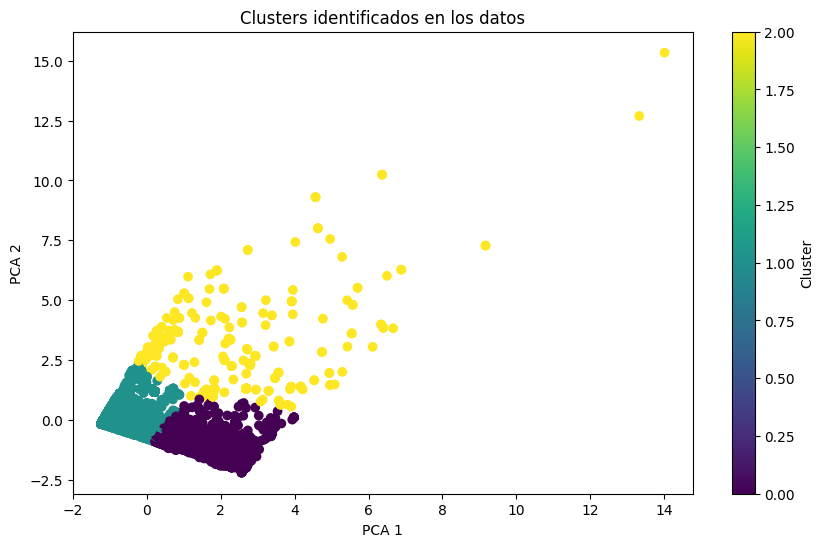

In [242]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las características numéricas para el clustering
numeric_columns = ['montototal', 'avancefinanciero', 'avancefisico', 'duracionobrasdias']
data_for_clustering = gdf_combined[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Aplicar PCA para reducir la dimensionalidad y facilitar la visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Aplicar K-means con un número predefinido de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Añadir los clusters al GeoDataFrame
gdf_combined['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters identificados en los datos')
plt.colorbar(label='Cluster')
plt.show()


### Representación versión 1 de Clusters en un Mapa

Finalmente, representamos los clusters en un mapa de Argentina utilizando folium y las geometrías extraídas de los GeoJSON.

In [243]:
import folium

# Crear un mapa centrado en Argentina (ajusta las coordenadas según sea necesario)
mapa = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Agregar los puntos del GeoDataFrame al mapa
for idx, row in gdf_combined.iterrows():
    # Suponiendo que las geometrías sean de tipo Point
    if row['geometry'].geom_type == 'Point':
        folium.CircleMarker(
            location=(row['geometry'].y, row['geometry'].x),
            radius=5,
            color=['red', 'green', 'blue'][row['Cluster']],
            fill=True,
            fill_opacity=0.6
        ).add_to(mapa)

# Mostrar el mapa
mapa


Guardamos en un HTML esta primera versión del mapa para compartirlo en gitgub y luego lo utilizaremos para la solución final que integra todos los componentes

In [244]:
# Guardar el mapa como un archivo HTML para cargar a Github
mapa.save('mapa_interactivo v.1.html')

##Mapa de brecha de menor y mayor inversión por Departamento


Objetivo: Identificar los departamentos con la mayor y menor inversión total a lo largo del tiempo.

In [254]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import MultiPoint

# Asegurarse de que 'geometry' esté en formato GeoSeries
df_combined['geometry'] = gpd.GeoSeries(df_combined['geometry'])

# Paso 1: Calcular Centroides para Departamentos
# Filtrar los departamentos con geometrías válidas y no vacías
df_combined_valid = df_combined[df_combined['geometry'].apply(lambda geom: geom.is_valid and not geom.is_empty)]

# Calcular centroides solo para los departamentos con geometrías válidas
departamentos_centroides = df_combined_valid.groupby('nombredepto_original')['geometry'].apply(
    lambda x: MultiPoint([point for point in x if point.geom_type == 'Point']).centroid)

df_depto_centroides = departamentos_centroides.reset_index()
df_depto_centroides.columns = ['nombredepto_original', 'centroid']

df_depto_inversion = df_combined_valid.groupby(['nombredepto_original', 'nombreprovincia_original'])['montototal'].sum().reset_index()
df_depto_centroides = df_depto_centroides.merge(df_depto_inversion, on='nombredepto_original')

# Paso 2: Clasificar los Departamentos en Mayor y Menor Inversión
percentil_50 = df_depto_centroides['montototal'].median()
df_depto_centroides['Cluster'] = df_depto_centroides['montototal'].apply(lambda x: 'Mayor Inversión' if x >= percentil_50 else 'Menor Inversión')

# Crear un mapa centrado en Argentina
mapa = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Crear capas para los departamentos de mayor y menor inversión
mayor_inversion = folium.FeatureGroup(name='Mayor Inversión', show=True)
menor_inversion = folium.FeatureGroup(name='Menor Inversión', show=True)

# Colores para los clusters
colores_cluster = {
    'Mayor Inversión': 'green',
    'Menor Inversión': 'red'
}

# Agregar círculos para los departamentos con mayor y menor inversión
for idx, row in df_depto_centroides.iterrows():
    if not row['centroid'].is_empty:  # Verificar que el centroide no esté vacío
        lat = row['centroid'].y
        lon = row['centroid'].x

        circle = folium.Circle(
            location=[lat, lon],
            radius=50000,
            color=colores_cluster[row['Cluster']],
            fill=True,
            fill_opacity=0.4,
            popup=f"Departamento: {row['nombredepto_original']}<br>Inversión Total: ${row['montototal']:.2f}"
        )

        if row['Cluster'] == 'Mayor Inversión':
            circle.add_to(mayor_inversion)
        else:
            circle.add_to(menor_inversion)

# Añadir las capas al mapa
mayor_inversion.add_to(mapa)
menor_inversion.add_to(mapa)

# Añadir la leyenda con el top 5
top_5_mayor = df_depto_centroides.nlargest(5, 'montototal')
top_5_menor = df_depto_centroides.nsmallest(5, 'montototal')

leyenda_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 300px; height: 400px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
<h4>Top 5 Departamentos por Inversión</h4>
<b>Mayor Inversión:</b><br>
""" + "<br>".join([f"{row['nombredepto_original']}: ${row['montototal']:.2f}" for _, row in top_5_mayor.iterrows()]) + """
<br><br>
<b>Menor Inversión:</b><br>
""" + "<br>".join([f"{row['nombredepto_original']}: ${row['montototal']:.2f}" for _, row in top_5_menor.iterrows()]) + """
</div>
"""
mapa.get_root().html.add_child(folium.Element(leyenda_html))

# Añadir el control de capas al mapa y colocarlo en la parte superior izquierda
folium.LayerControl(position='topleft').add_to(mapa)

# Mostrar el mapa
mapa
# Guardar el mapa como un archivo HTML para cargar a Github
mapa.save('Mapa de brecha de menor y mayor inversión por Departamento v.1.html')